In [1]:
import sys


sys.path.append("..")

In [2]:
import numpy as np
from tqdm.notebook import tqdm
from mango.mango import Mango
import torch
from mango.agents.agents import Agent
from mango.environments import frozen_lake

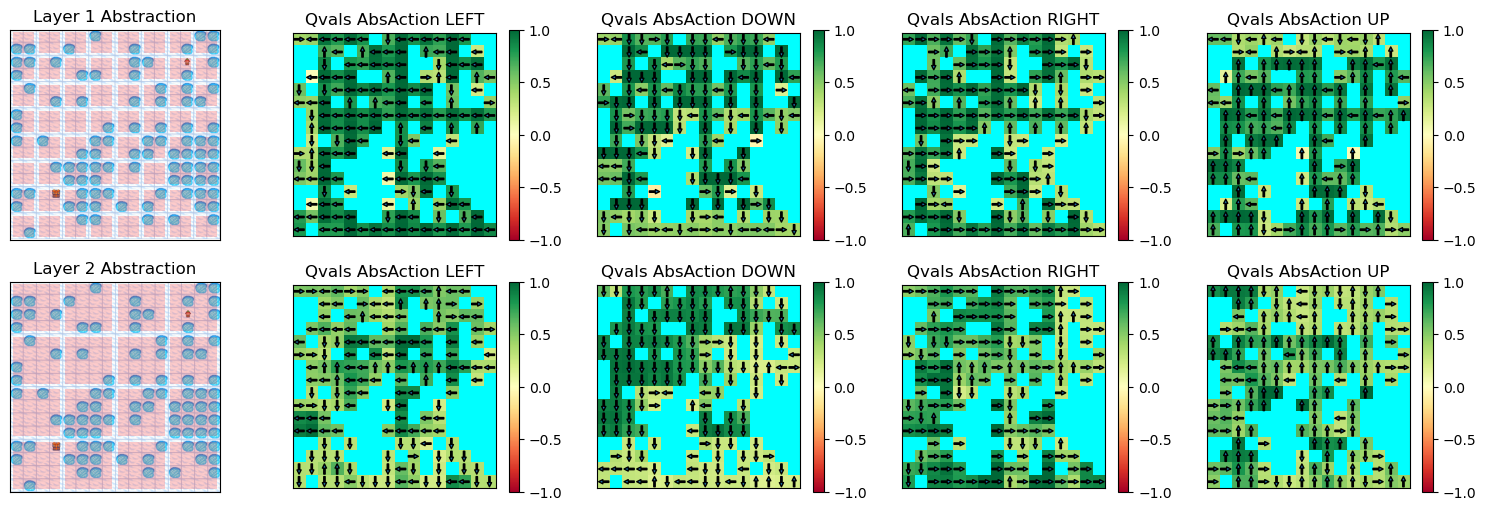

In [3]:
mango = Mango.load_from("trained_models/frozen_lake_mango.pickle")
agent = Agent(
    mango,
    policy_params=dict(
        lr=1e-2,
        gamma=0.9,
        net_params=dict(
            hidden_channels=[8, 8, 8],
            hidden_features=[64, 16],
            activation_out=torch.nn.Tanh(),
            batch_norm=True,
            residual_connections=True,
            device=torch.device("cuda") if torch.cuda.is_available() else None,
        ),
    ),
)
frozen_lake.plot_all_qvals(mango)

In [4]:
N = 1000
for randomness in (pbar := tqdm(np.linspace(0.99, 0.0, N))):
    pbar.set_description(f"randomness: {randomness:.3f}")
    obs, reward, term, trunc, info = agent.explore(episode_length=100, randomness=randomness)
    agent.train()
agent.save_to("trained_models/frozen_lake_agent.pickle")

  0%|          | 0/1000 [00:00<?, ?it/s]

RuntimeError: running_mean should contain 12 elements not 8